In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('../data/migraine.csv')
pd.set_option('display.float_format', '{:0.2f}'.format)

In [30]:
from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:, :-1]
y = df['Type']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("KNN Precision:\t ", format(knn.score(X_train, y_train)))
print("KNN Accuracy:\t ", metrics.accuracy_score(y_test, y_pred))

KNN Precision:	  0.85
KNN Accuracy:	  0.7875


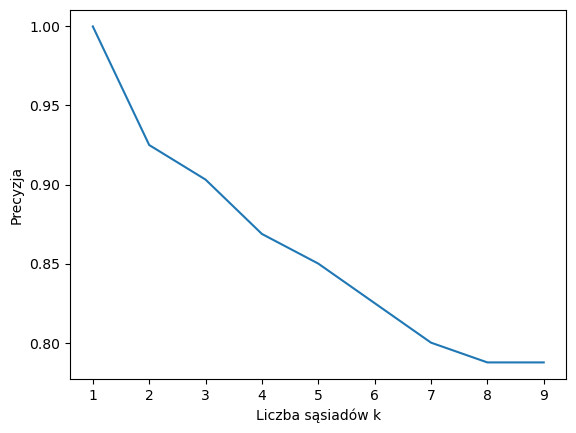

{1: 1.0, 2: 0.925, 3: 0.903125, 4: 0.86875, 5: 0.85, 6: 0.825, 7: 0.8, 8: 0.7875, 9: 0.7875}
{1: 0.7875, 2: 0.7875, 3: 0.7875, 4: 0.7875, 5: 0.7875, 6: 0.7875, 7: 0.7875, 8: 0.7875, 9: 0.7875}


In [32]:
precisions = {}
accuracies = {}
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    precisions[k] = knn.score(X_train, y_train)
    accuracies[k] = metrics.accuracy_score(y_test, y_pred)
plt.figure()
plt.plot(range(1, 10), list(precisions.values()))
plt.xlabel('Liczba sąsiadów k')
plt.ylabel('Precyzja')
plt.show()

print(precisions)
print(accuracies)

Optymalna liczba sąsiadów: 1


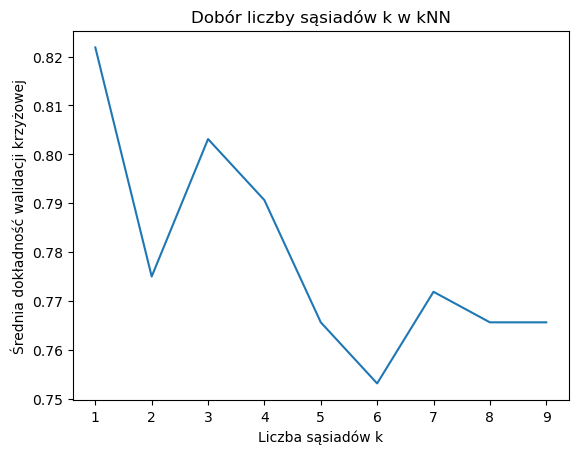

In [33]:
from sklearn.model_selection import cross_val_score

n_values = range(1,10)
cv_scores = []

# Walidacja krzyżowa dla każdej wartości k
for k in n_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Znajdź wartość k z najwyższą średnią dokładnością
optimal_k = n_values[np.argmax(cv_scores)]
print(f"Optymalna liczba sąsiadów: {optimal_k}")

# Wykres błędu walidacji
import matplotlib.pyplot as plt

plt.plot(n_values, cv_scores)
plt.xlabel('Liczba sąsiadów k')
plt.ylabel('Średnia dokładność walidacji krzyżowej')
plt.title('Dobór liczby sąsiadów k w kNN')
plt.show()